Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key'],
      dtype='object')
acousticness


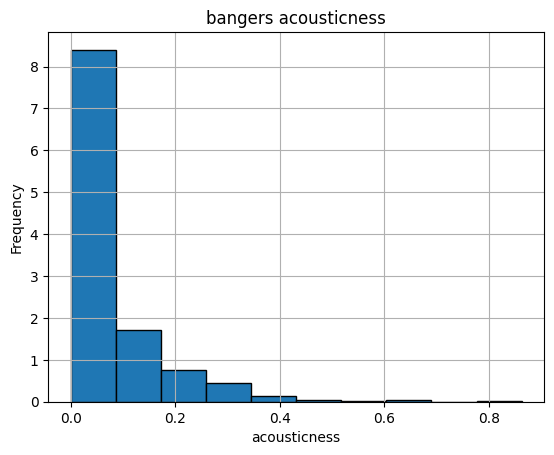

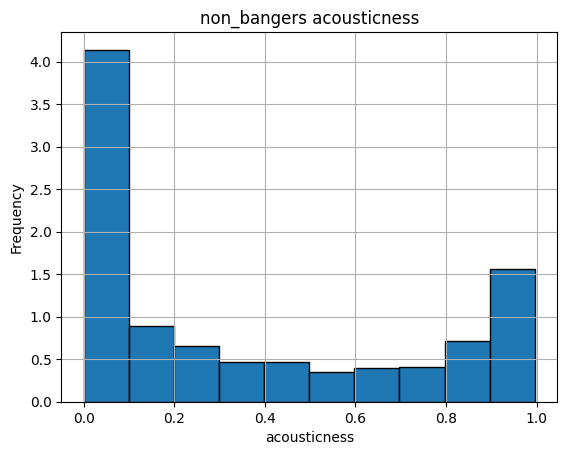

danceability


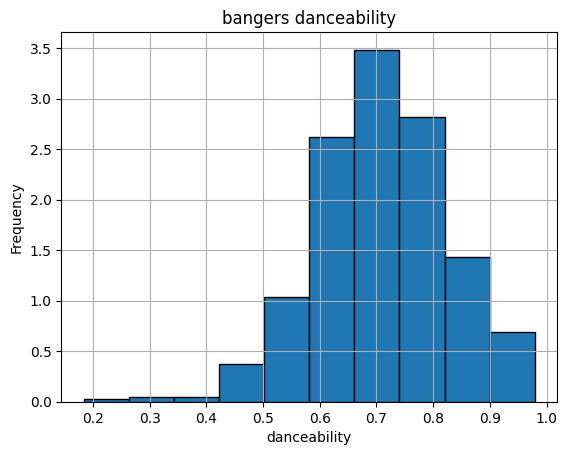

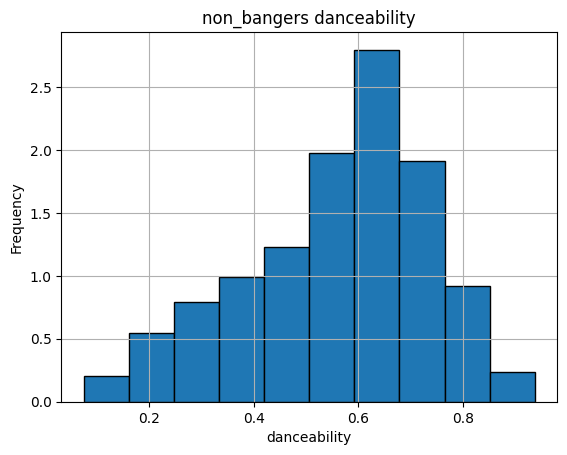

duration_ms


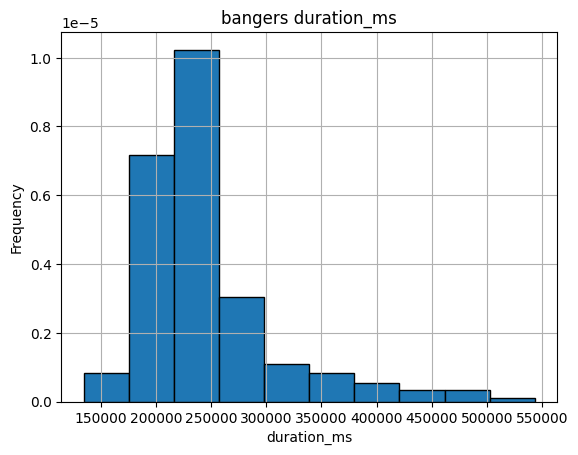

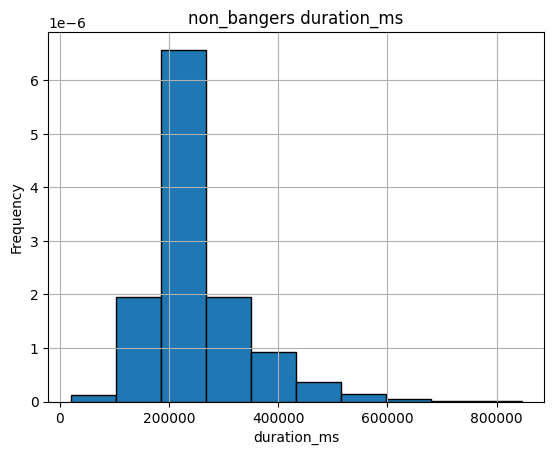

energy


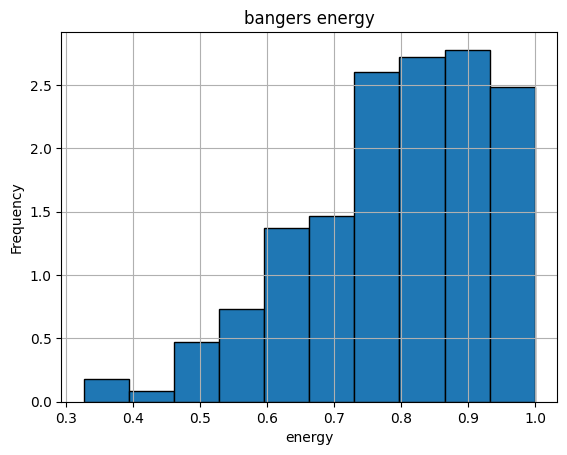

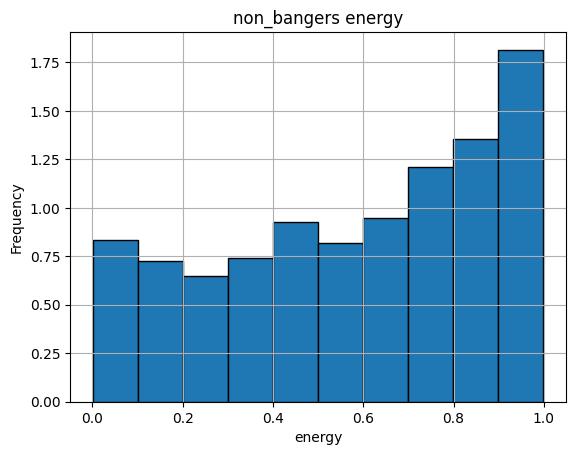

instrumentalness


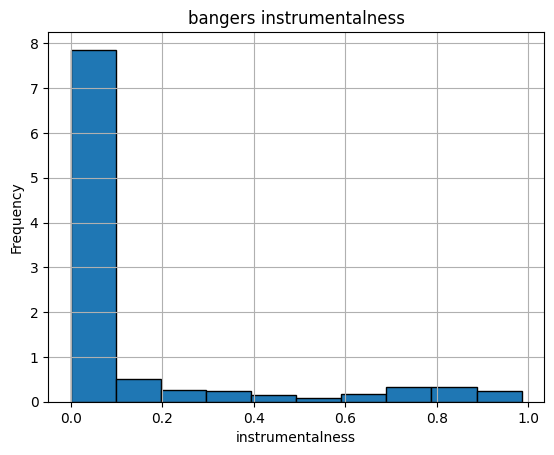

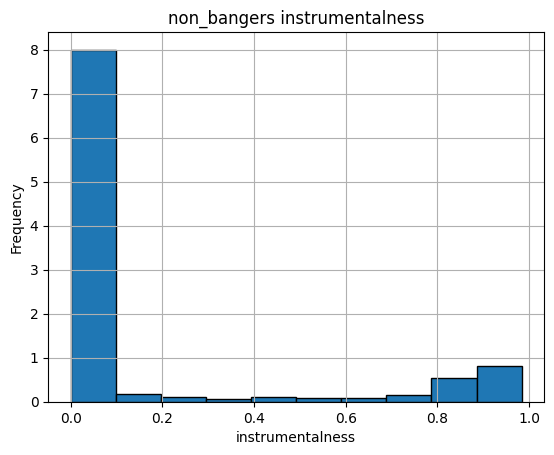

liveness


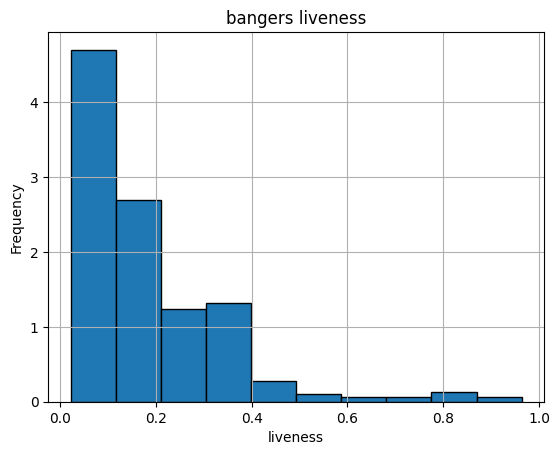

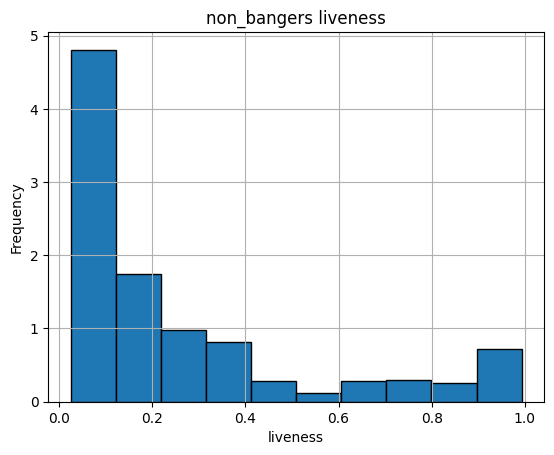

loudness


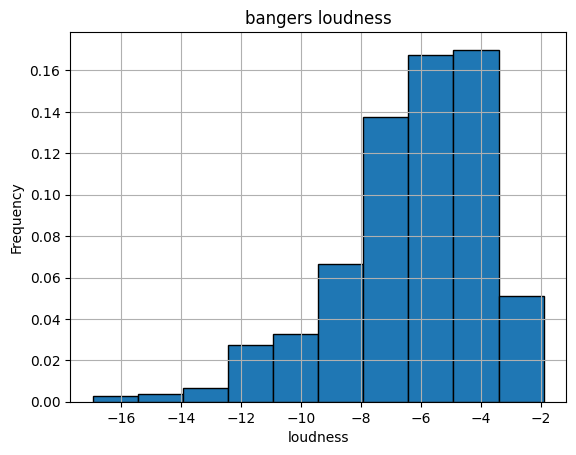

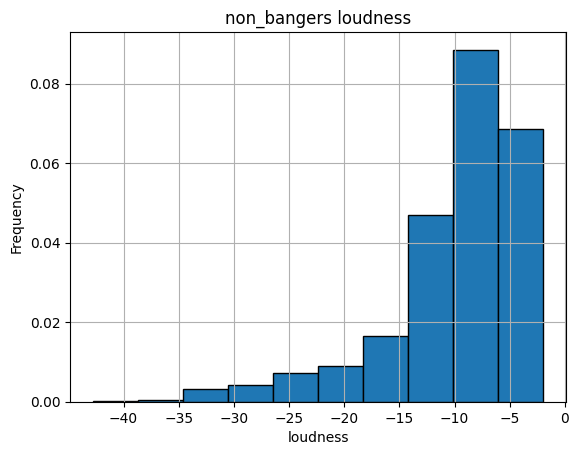

speechiness


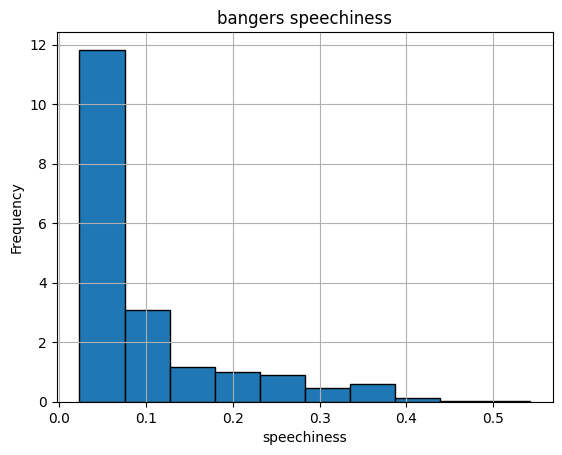

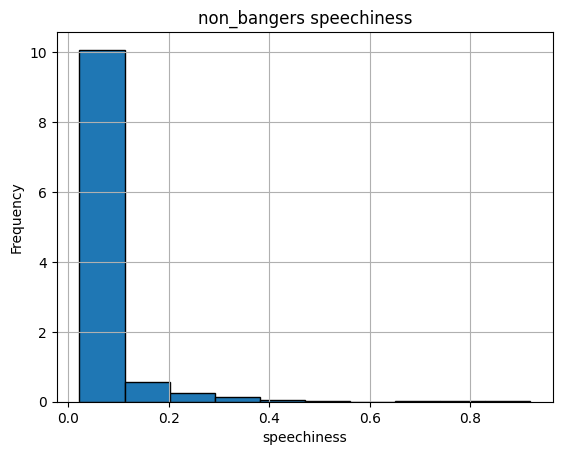

tempo


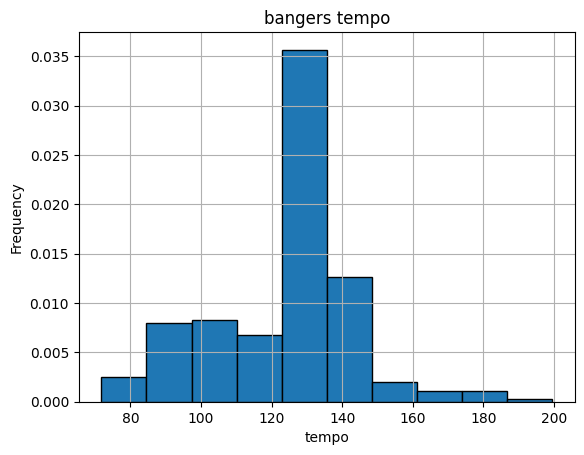

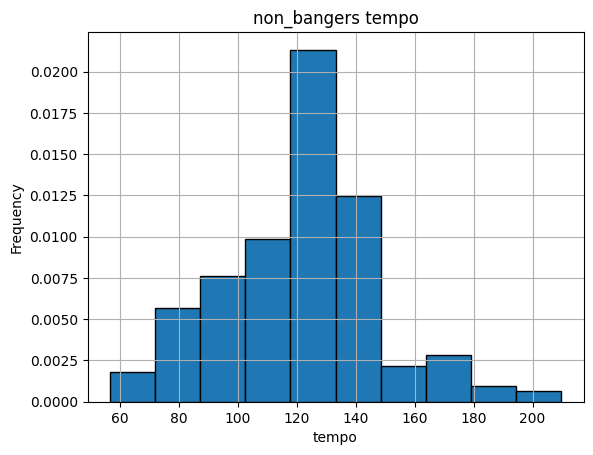

valence


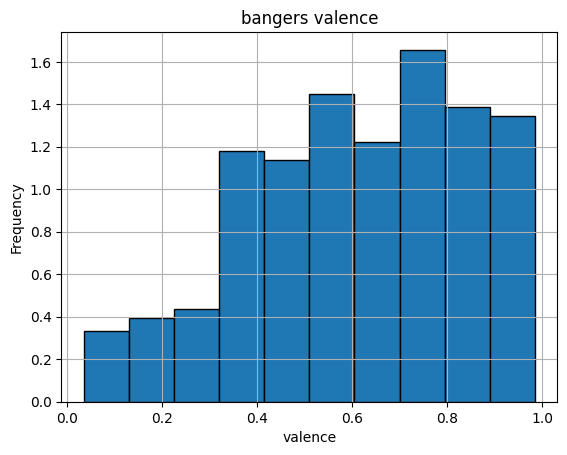

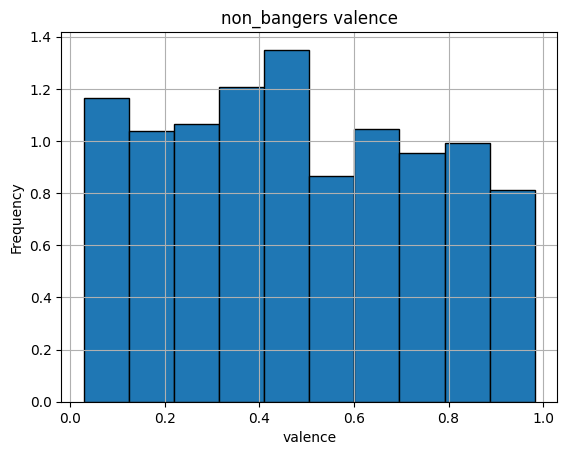

key


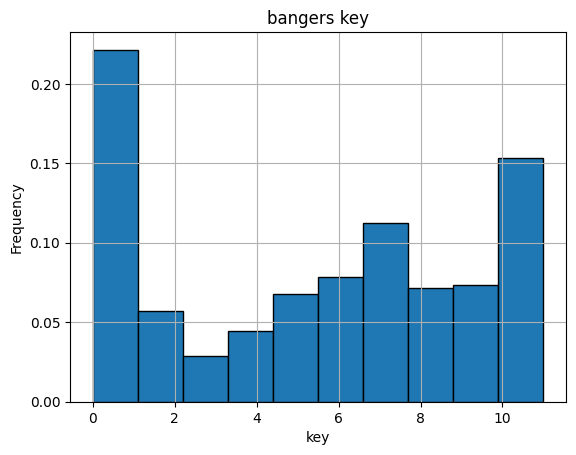

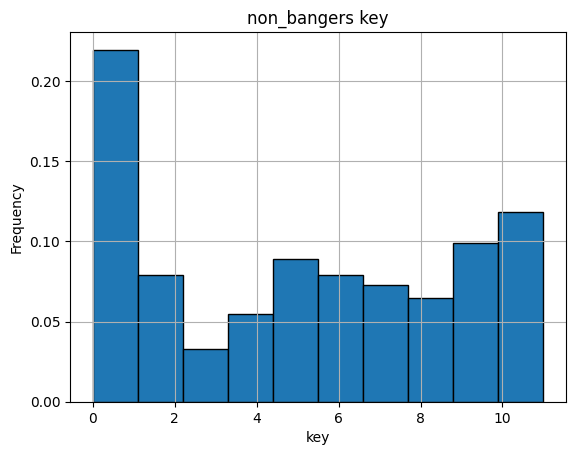

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bangers_df = pd.read_csv("./banger_features.csv")
non_bangers_df = pd.read_csv("./nonbanger_features.csv")

features_list = bangers_df.iloc[:, 3:14].columns
print(features_list)

for feature in features_list:
    #generate graph for each category
    #values = bangers_df[feature]
    #data = {feature: values}
    print(feature)
    #temp_df = df = pd.DataFrame(data)
    #temp_df['values'].plot.hist(bins=5, edgecolor='black')
    ax = bangers_df[feature].hist(bins=10, edgecolor='black', density=True,weights = 100*(np.ones(len(bangers_df[feature]))/len(bangers_df[feature])))  # Adjust the number of bins as needed
    ax.set_title("bangers " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    plt.show()
    bx = non_bangers_df[feature].hist(bins=10, edgecolor='black', density = True,weights = 100*(np.ones(len(non_bangers_df[feature]))/len(non_bangers_df[feature])))  # Adjust the number of bins as needed
    bx.set_title("non_bangers " + feature)
    bx.set_xlabel(feature)
    bx.set_ylabel('Percentage')
    plt.show()


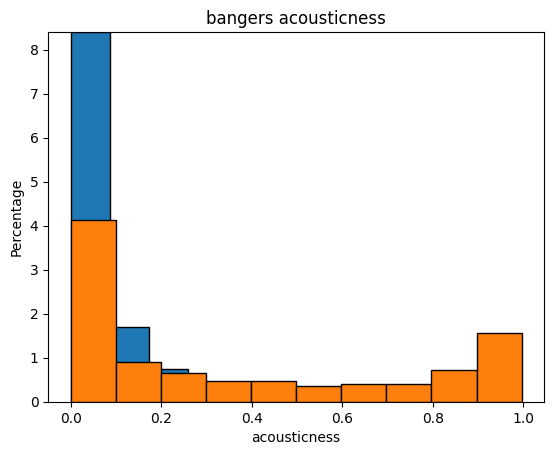

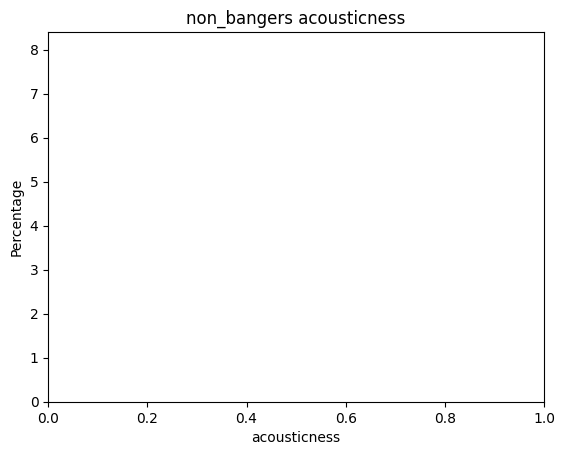

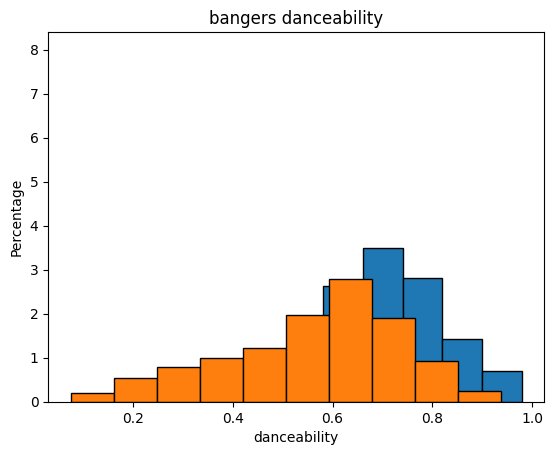

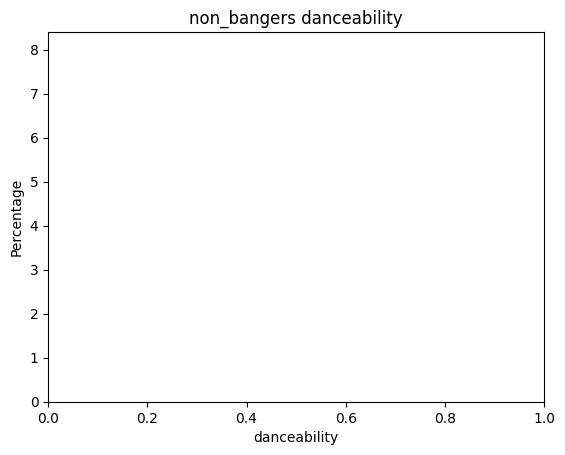

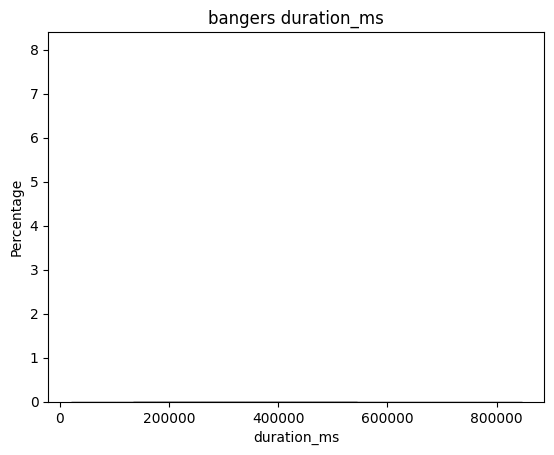

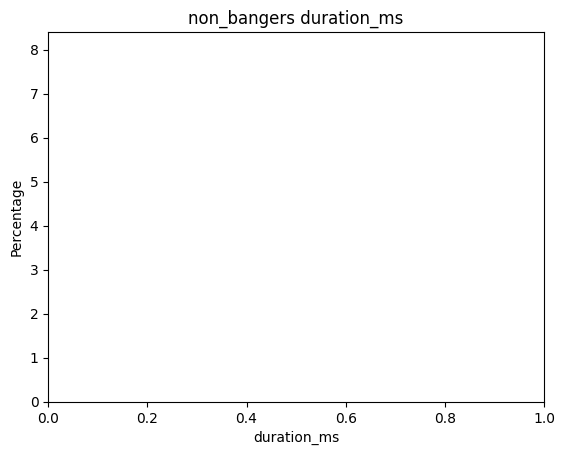

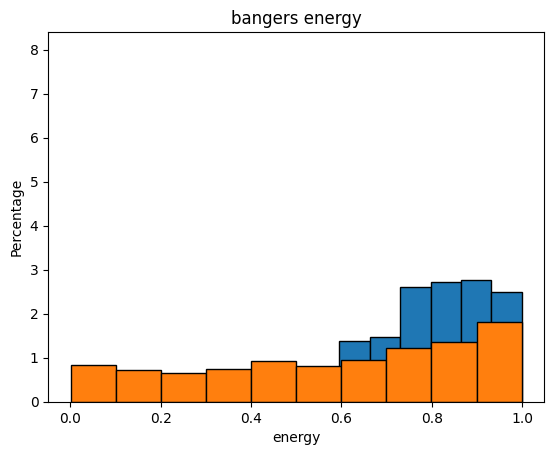

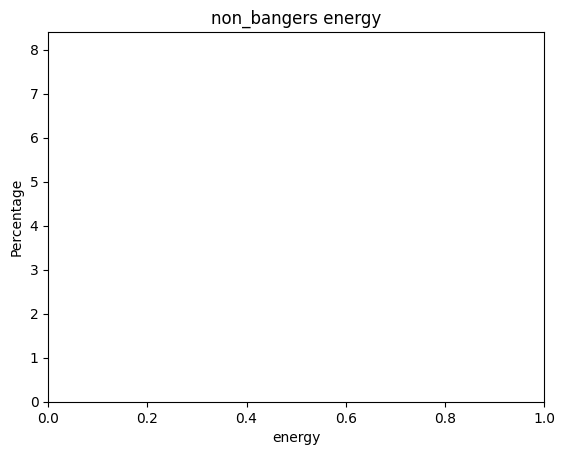

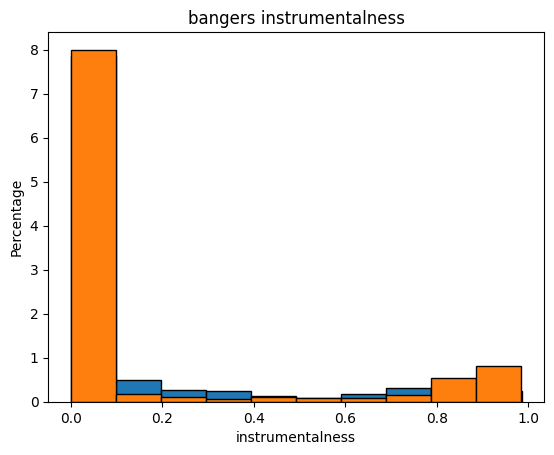

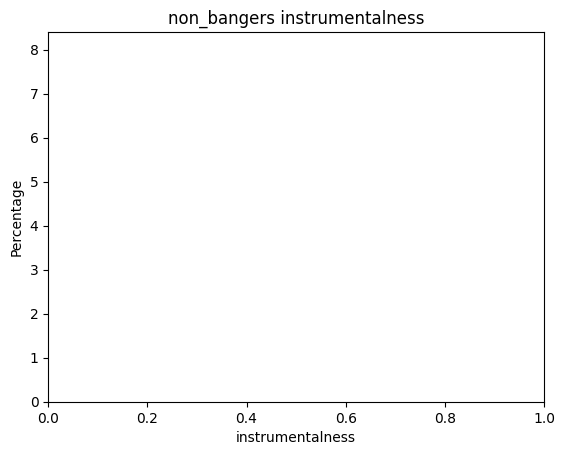

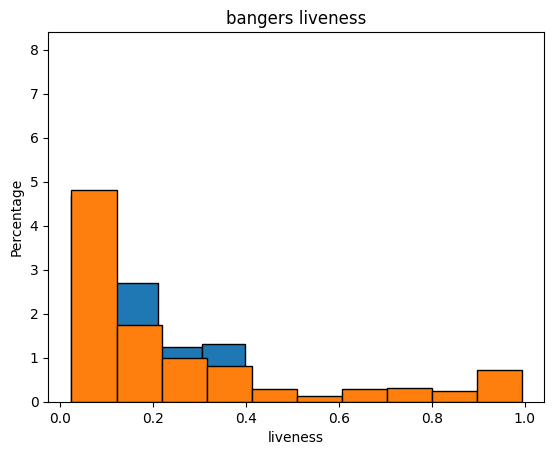

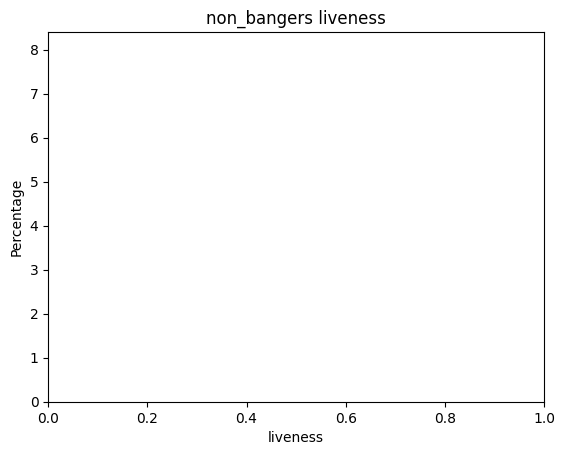

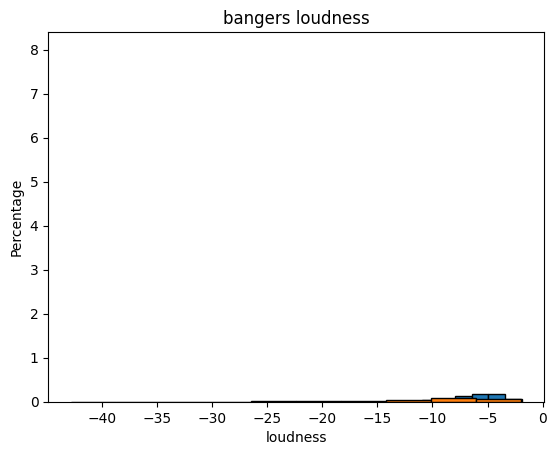

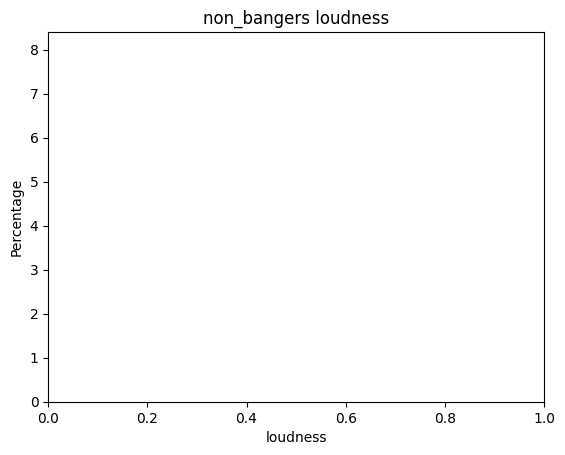

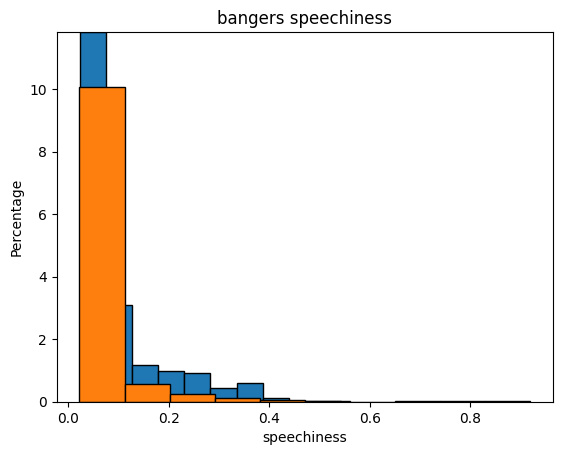

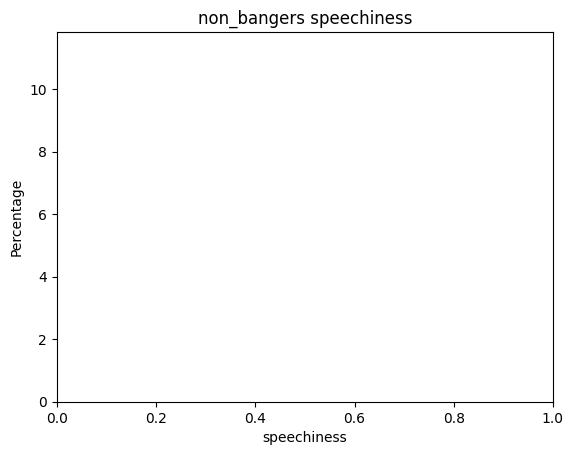

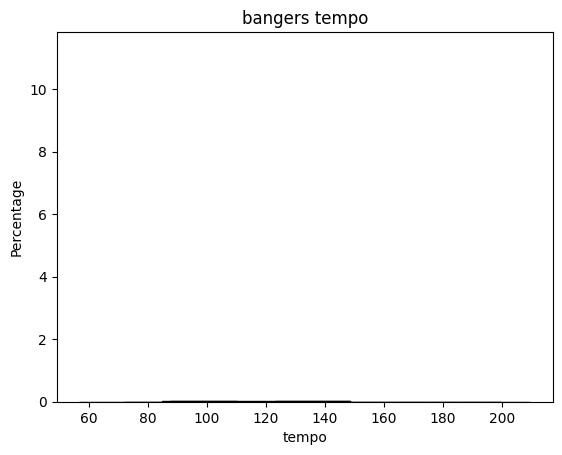

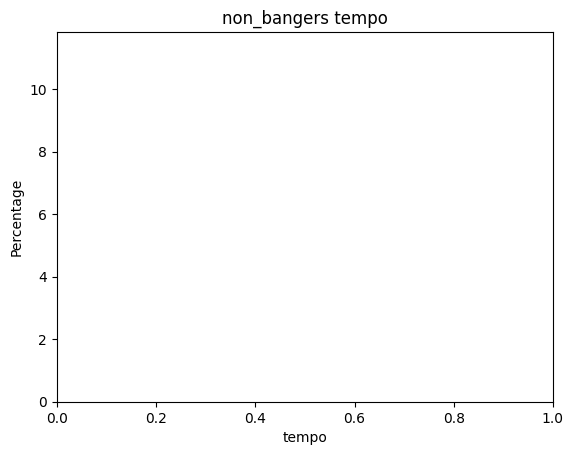

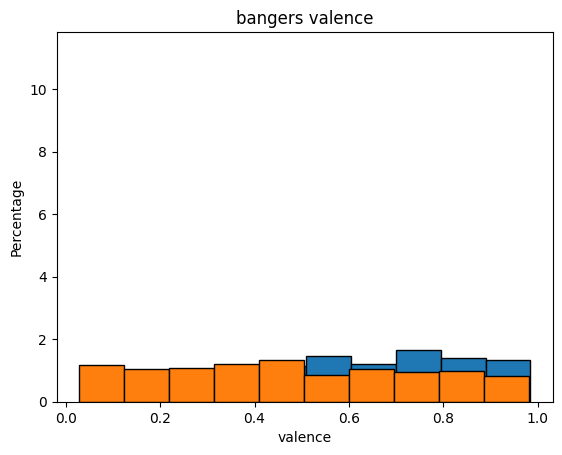

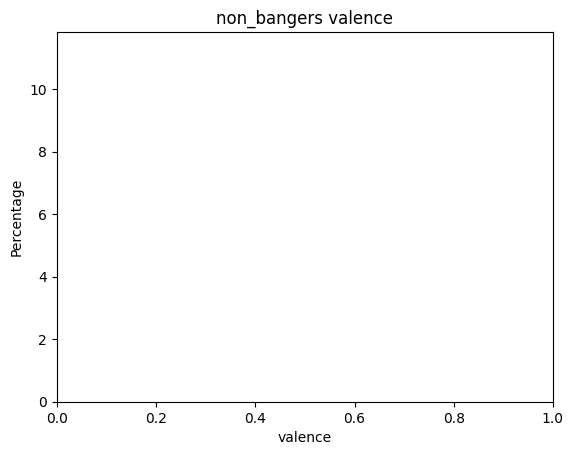

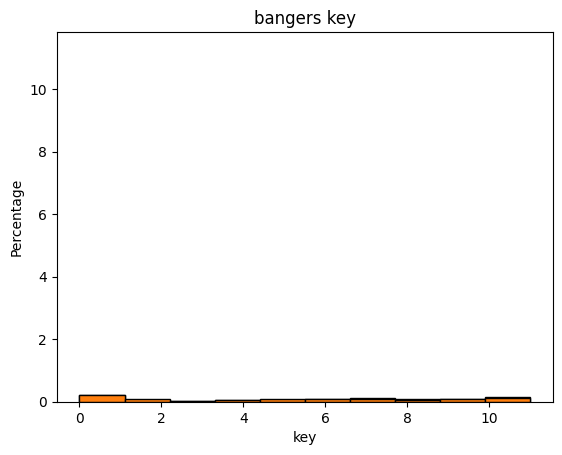

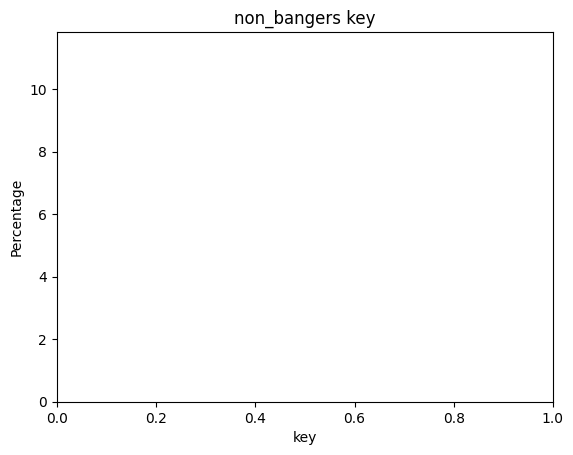

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bangers_df = pd.read_csv("./banger_features.csv")
non_bangers_df = pd.read_csv("./nonbanger_features.csv")

features_list = bangers_df.iloc[:, 3:14].columns

max_frequency = 0  # Maximum frequency across all plots

for feature in features_list:
    # Calculate the histogram for bangers
    banger_hist, banger_bins, _ = plt.hist(bangers_df[feature], bins=10, edgecolor='black', density=True,
                                           weights=np.ones(len(bangers_df[feature])) / len(bangers_df[feature]))

    # Calculate the histogram for non-bangers
    non_banger_hist, non_banger_bins, _ = plt.hist(non_bangers_df[feature], bins=10, edgecolor='black', density=True,
                                                   weights=np.ones(len(non_bangers_df[feature])) / len(non_bangers_df[feature]))

    # Update max_frequency if needed
    max_percentage = max(max_percentage, max(banger_hist.max(), non_banger_hist.max()))

    # Plot the histogram for bangers
    # ax = plt.gca()
    ax.set_ylim(0, max_frequency)  # Set y-axis limits
    ax.set_title("bangers " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')  # Updated y-axis label
    # plt.show()

    # Plot the histogram for non-bangers
    # bx = plt.gca()
    bx.set_ylim(0, max_frequency)  # Set y-axis limits
    bx.set_title("non_bangers " + feature)
    bx.set_xlabel(feature)
    bx.set_ylabel('Percentage')  # Updated y-axis label
    # plt.show()
